In [1]:
from src.downscaling.utils.visualization import *

In [2]:
# dir = 'data/results/WithOptuna/skills/'
# das = []
# for i,evalType in enumerate(['in_tnvl','in_test','hc_test']):
#     for fold in range(3):
#         path = f'{dir}/Pixel_score_fold{fold}_n_iter_1_{evalType}.pkl'
#         if not os.path.exists(path): continue
#         da = pkl.load(open(path,'rb')).unstack()
#         da = da.expand_dims(fold=[fold])
#         print(evalType, da.dims,da.shape)
#         if da.time.size==1:
#             da = da.assign_coords(time=[f'{i}_{evalType}'])
#         else:
#             da = da.assign_coords(time=[f'W{ele+1}' for ele in range(da.time.size)])
#         das.append(da)
# das = xr.combine_by_coords(das)
# das_maps = to_Domain(das,'Europe')
# das = get_weighted_spatial_mean(das_maps).mean('fold').squeeze()
# print(das.dims)
# print(das.model.data)
# model = ['ECMWF','MLR', 'MLR_stocha','CNN', 'CNN_stocha']
# for score in ['MSE','CRPS','SSR']:
#     plt.figure()
#     das.sel(score=score,model=model).plot(hue='model')

In [3]:
n_iter = 1000
das = xr.concat([pkl.load(open(f'data/results/WithOptuna/skills/Pixel_score_fold{fold}_n_iter_{n_iter}_hc_test.pkl','rb'))[0].expand_dims(fold=[fold]) for fold in range(3)],dim='fold').squeeze().mean('fold')
das = das.assign_coords(time=[f'Week {w}' for w in range(1,7)])
das.dims,das.shape,das.score.data

(('boot', 'score', 'model', 'time', 'lat', 'lon'),
 (1000, 8, 7, 6, 14, 20),
 array(['BIAS', 'CRPS', 'FCRPS', 'TERM1', 'TERM2', 'FTERM2', 'MSE', 'SSR'],
       dtype='<U6'))

In [4]:
if 'boot' in das.dims:
    das = das.rename({'boot':'bootstrap'})

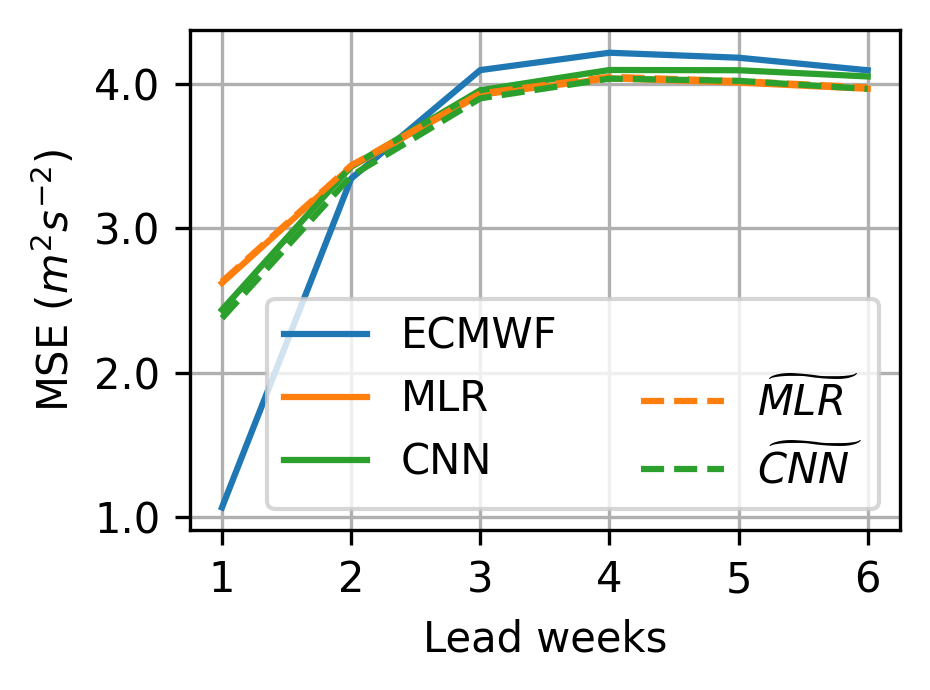

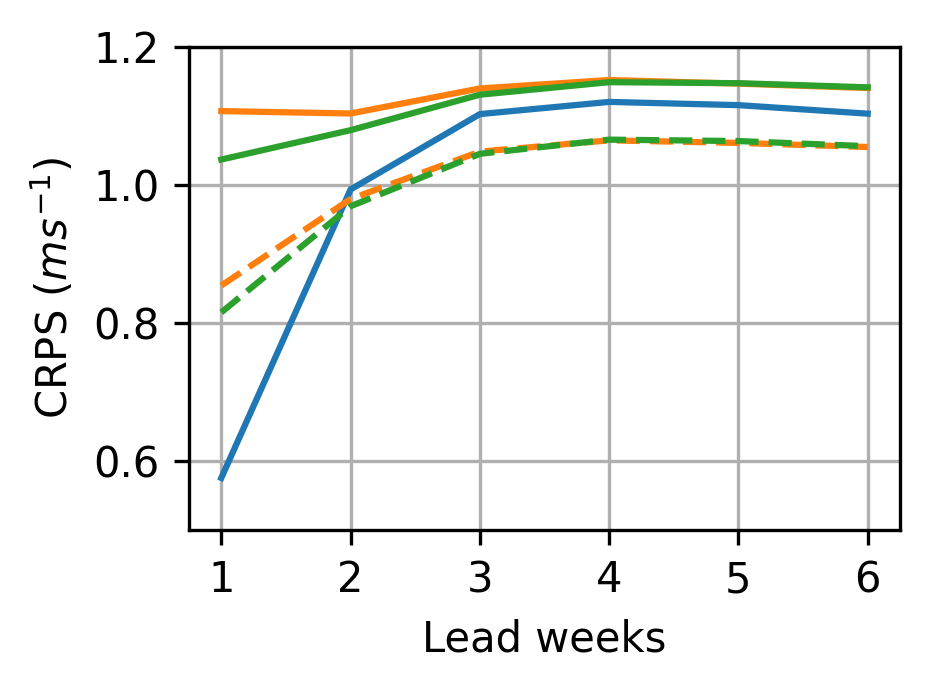

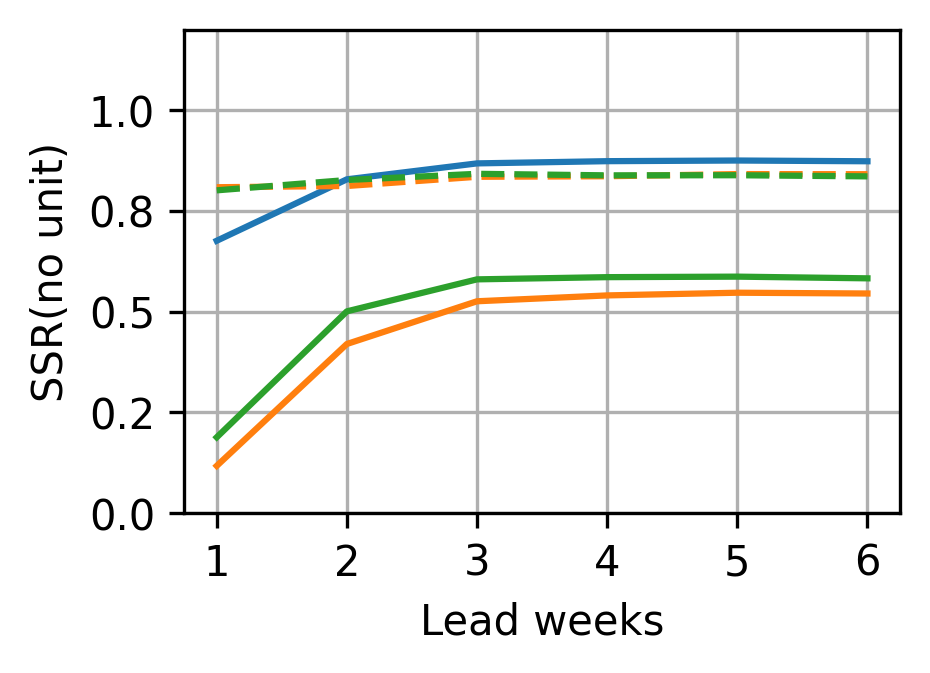

In [5]:
models_p1 = [
    'ECMWF',
    'MLR',
    'CNN',
    'MLR_stocha',
    'CNN_stocha',
    ]
labels_p1 = [
    'ECMWF',
    'MLR',
    'CNN',
    r"$\widetilde{MLR}$",
    r"$\widetilde{CNN}$",
    ]
colors_p1 = [
    'C0',
    'C1',
    'C2',
    'C1',
    'C2',
    ]
linestyles_p1 = [
    '-',
    '-',
    '-',
    '--',
    '--',
]
das = das.sel(score=['MSE','CRPS','SSR'])
if 'boostrap' in das.dims:
    das_curves = das.median('bootstrap')
else:
    das_curves = das
forPaper_curves(das_curves, models_p1, colors_p1, labels_p1, linestyles_p1, title='',save_plt_path='data/results/WithOptuna/visualizations')

Saved in data/results/WithOptuna/visualizations/maps_week_3
Saved in data/results/WithOptuna/visualizations/maps_week_4_5_6
Saved in data/results/WithOptuna/visualizations/maps_week_3
Saved in data/results/WithOptuna/visualizations/maps_week_4_5_6
Saved in data/results/WithOptuna/visualizations/maps_week_3
Saved in data/results/WithOptuna/visualizations/maps_week_4_5_6
Saved in data/results/WithOptuna/visualizations/maps_week_3
Saved in data/results/WithOptuna/visualizations/maps_week_4_5_6


<Figure size 1920x1440 with 0 Axes>

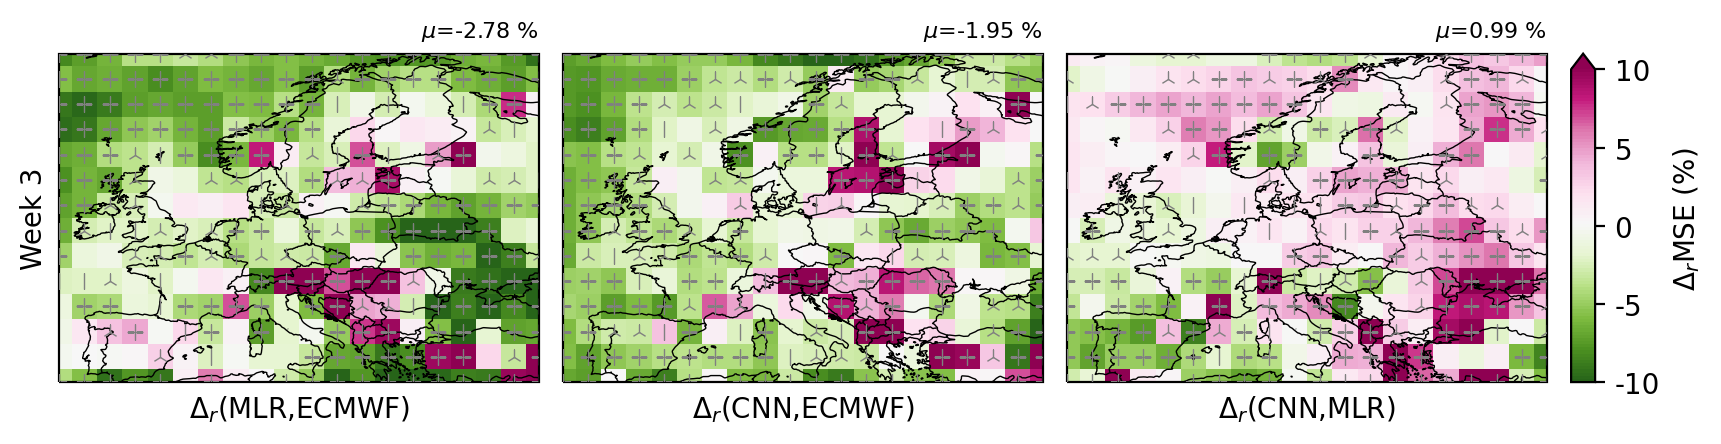

<Figure size 1920x1440 with 0 Axes>

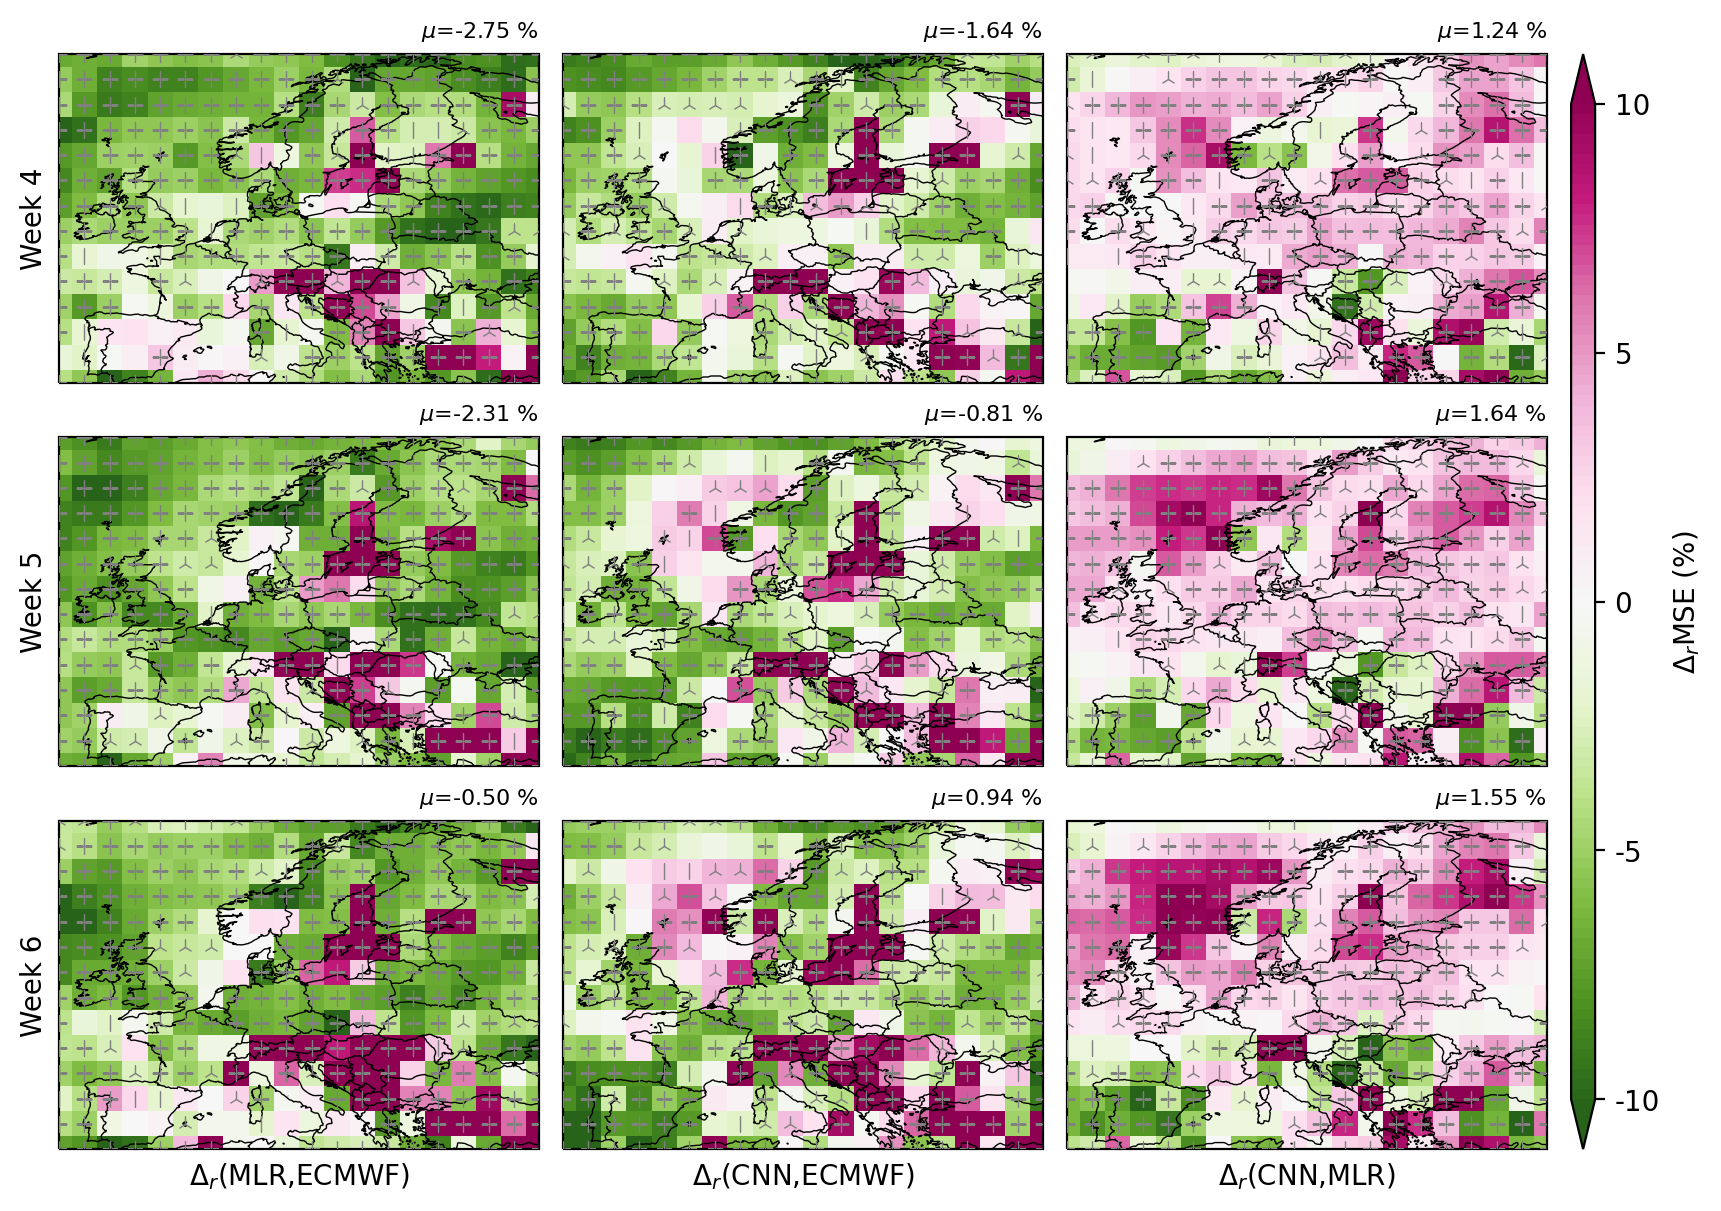

<Figure size 1920x1440 with 0 Axes>

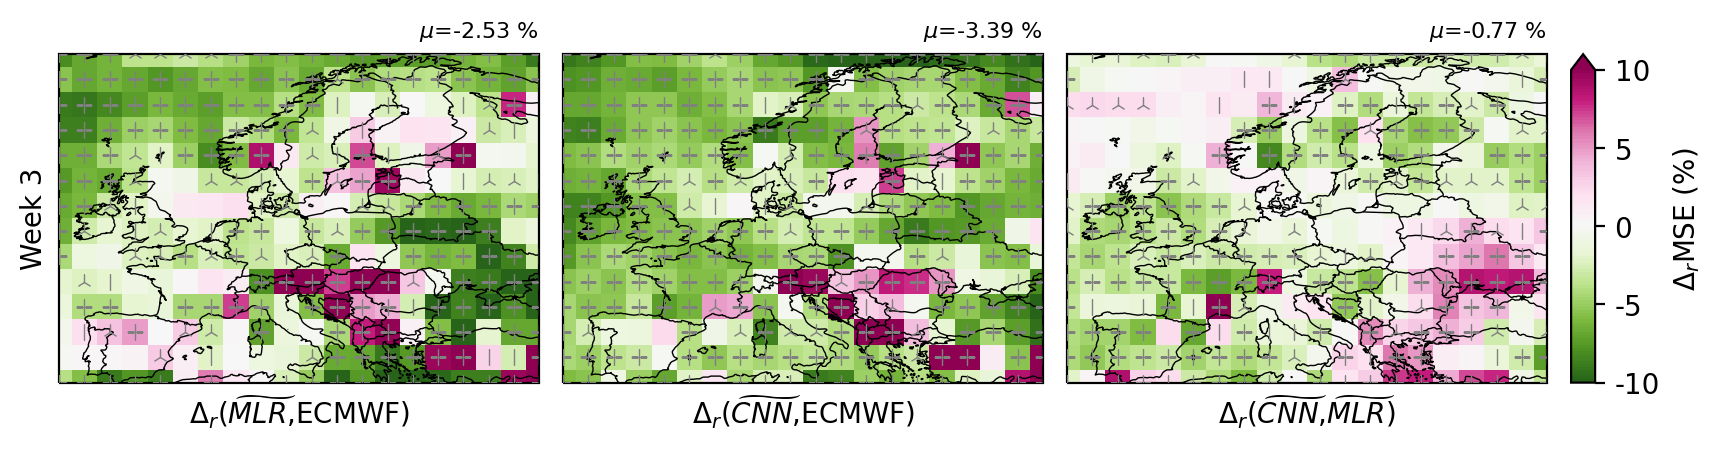

<Figure size 1920x1440 with 0 Axes>

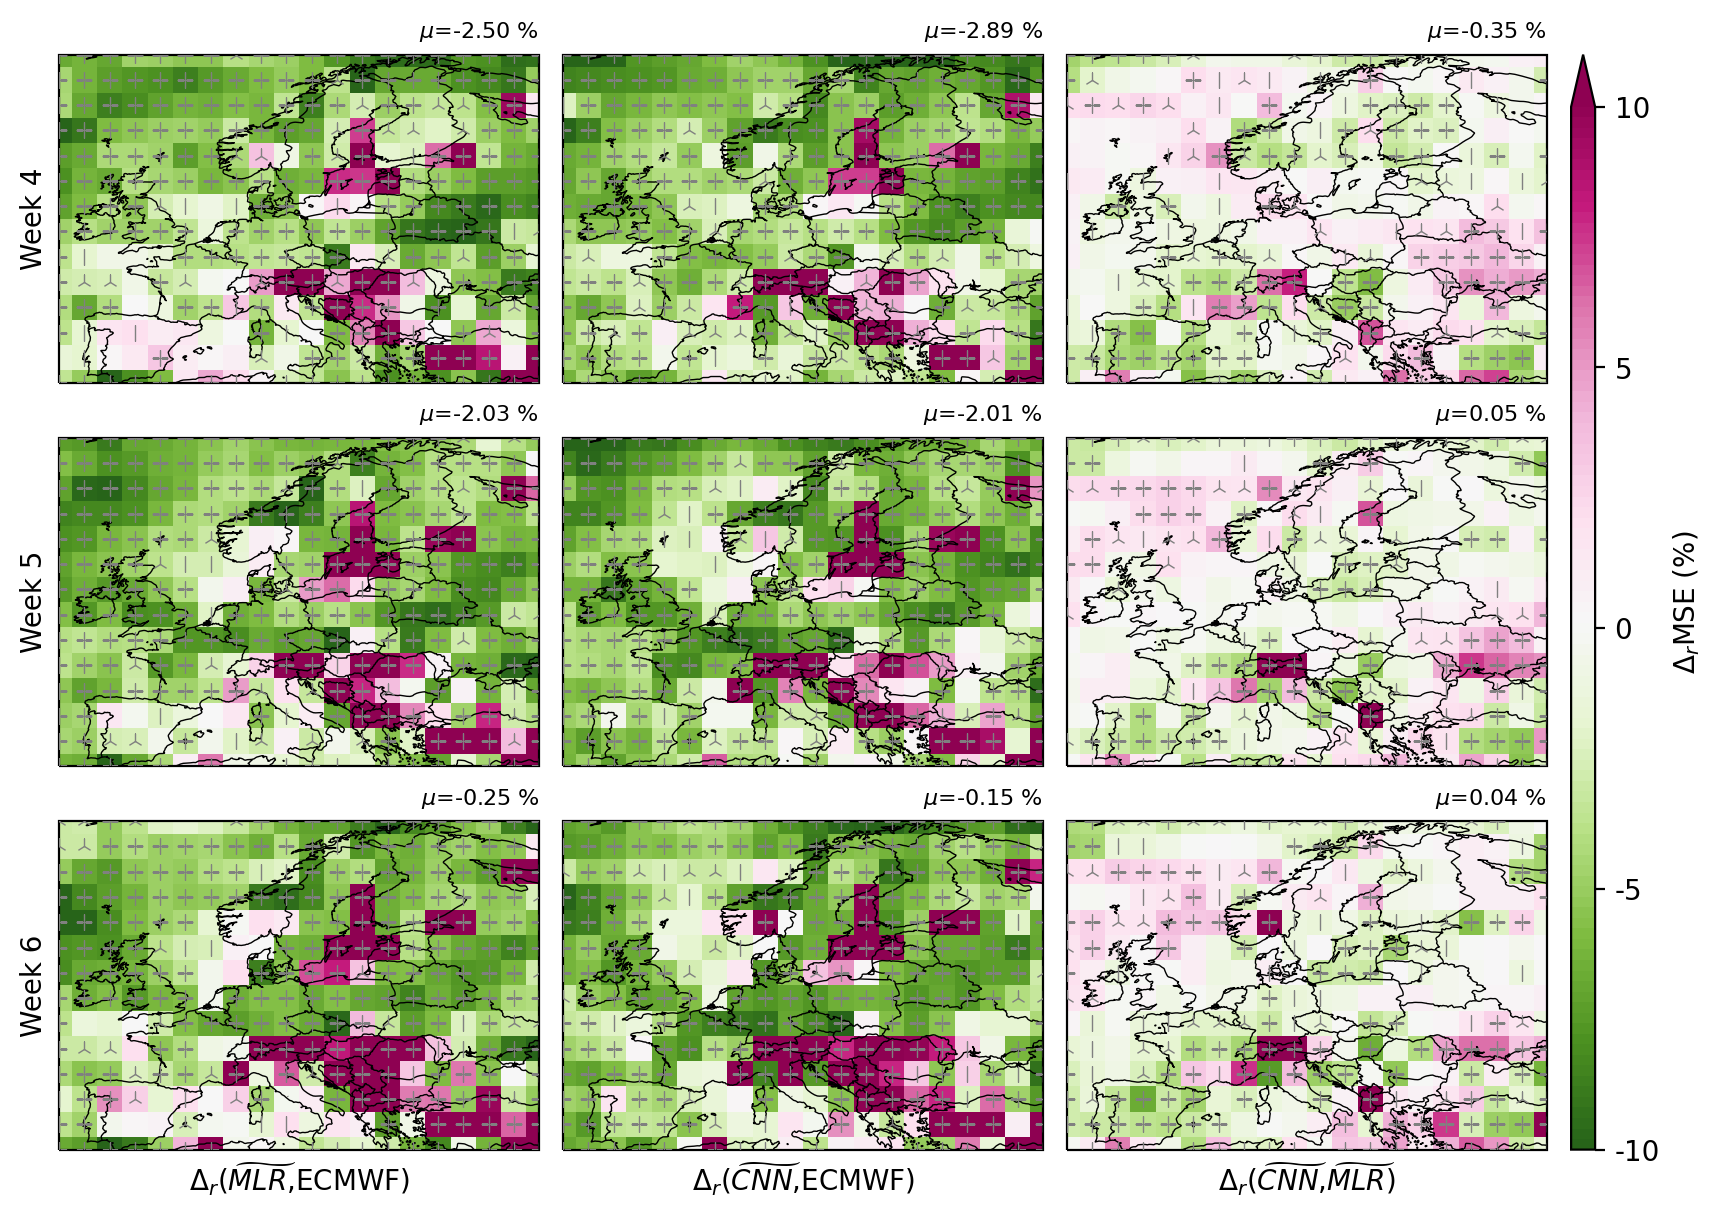

<Figure size 1920x1440 with 0 Axes>

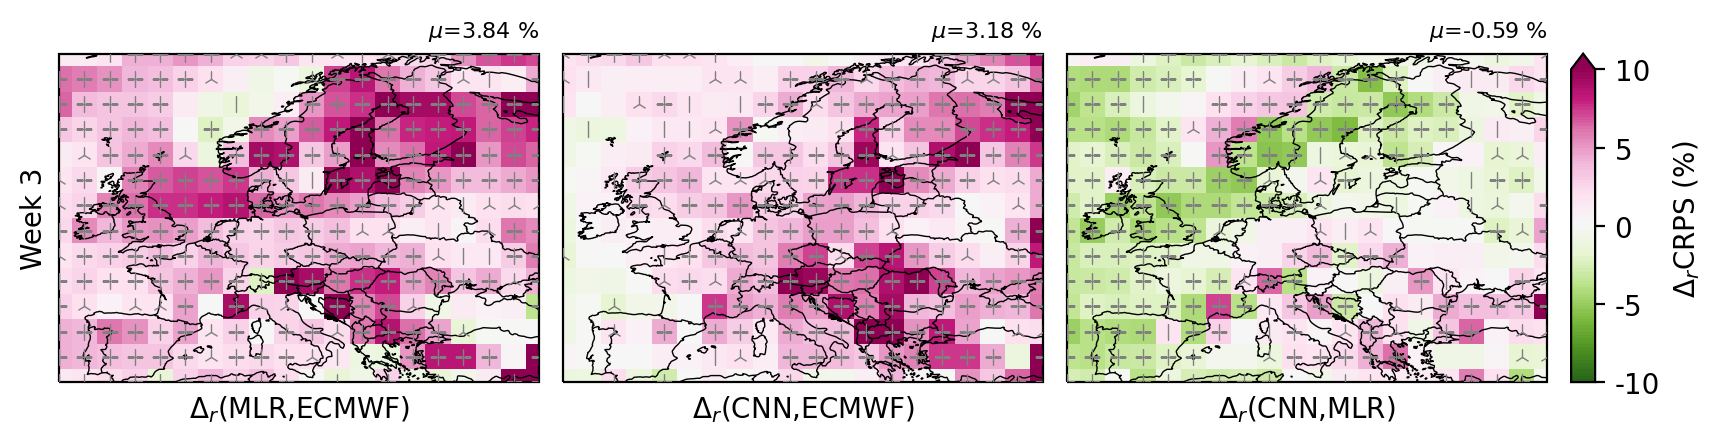

<Figure size 1920x1440 with 0 Axes>

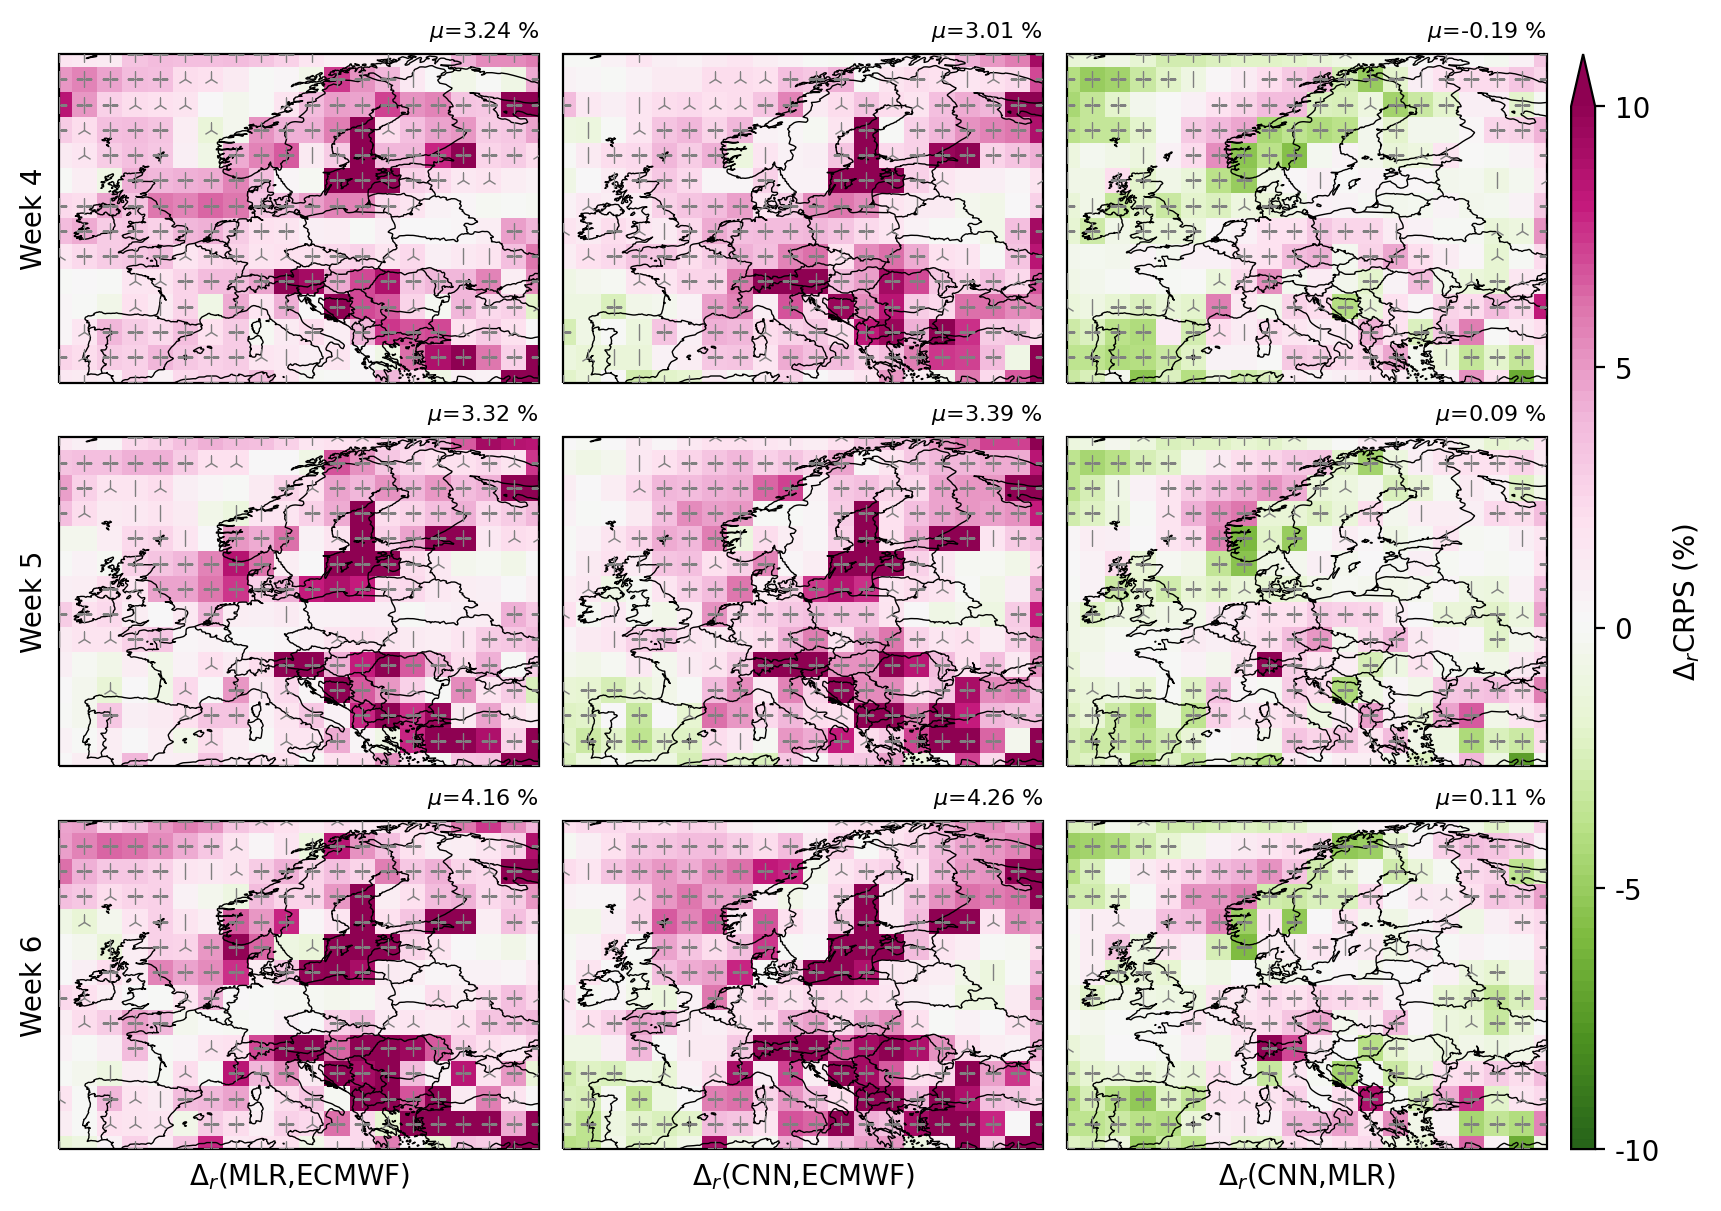

<Figure size 1920x1440 with 0 Axes>

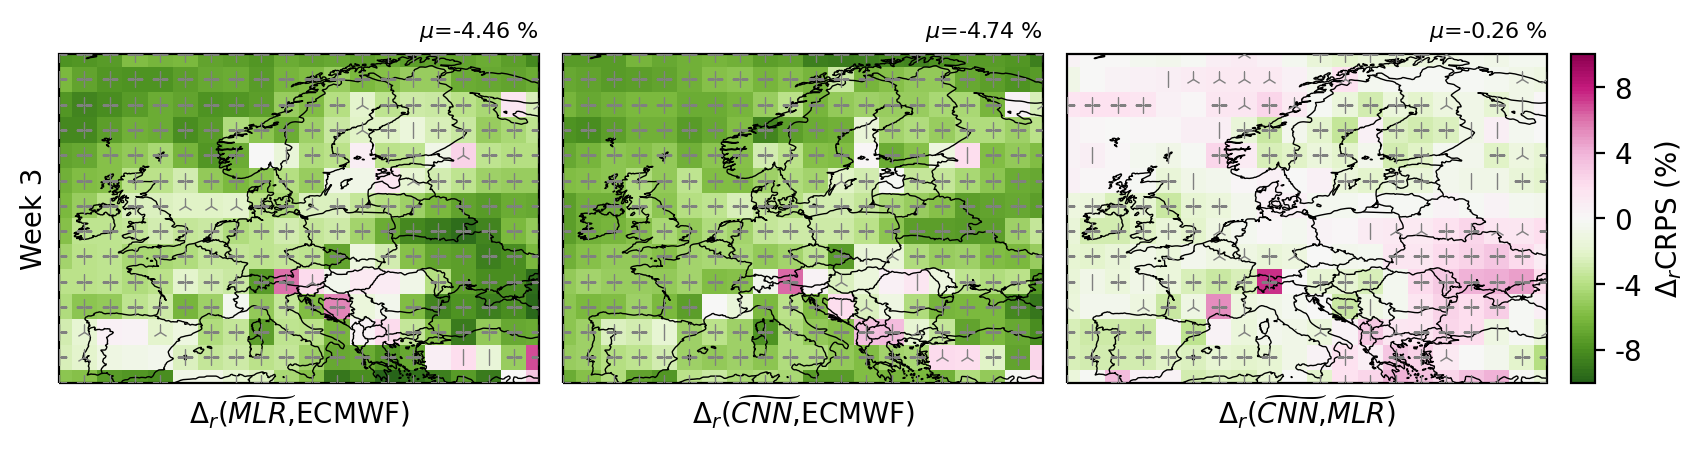

<Figure size 1920x1440 with 0 Axes>

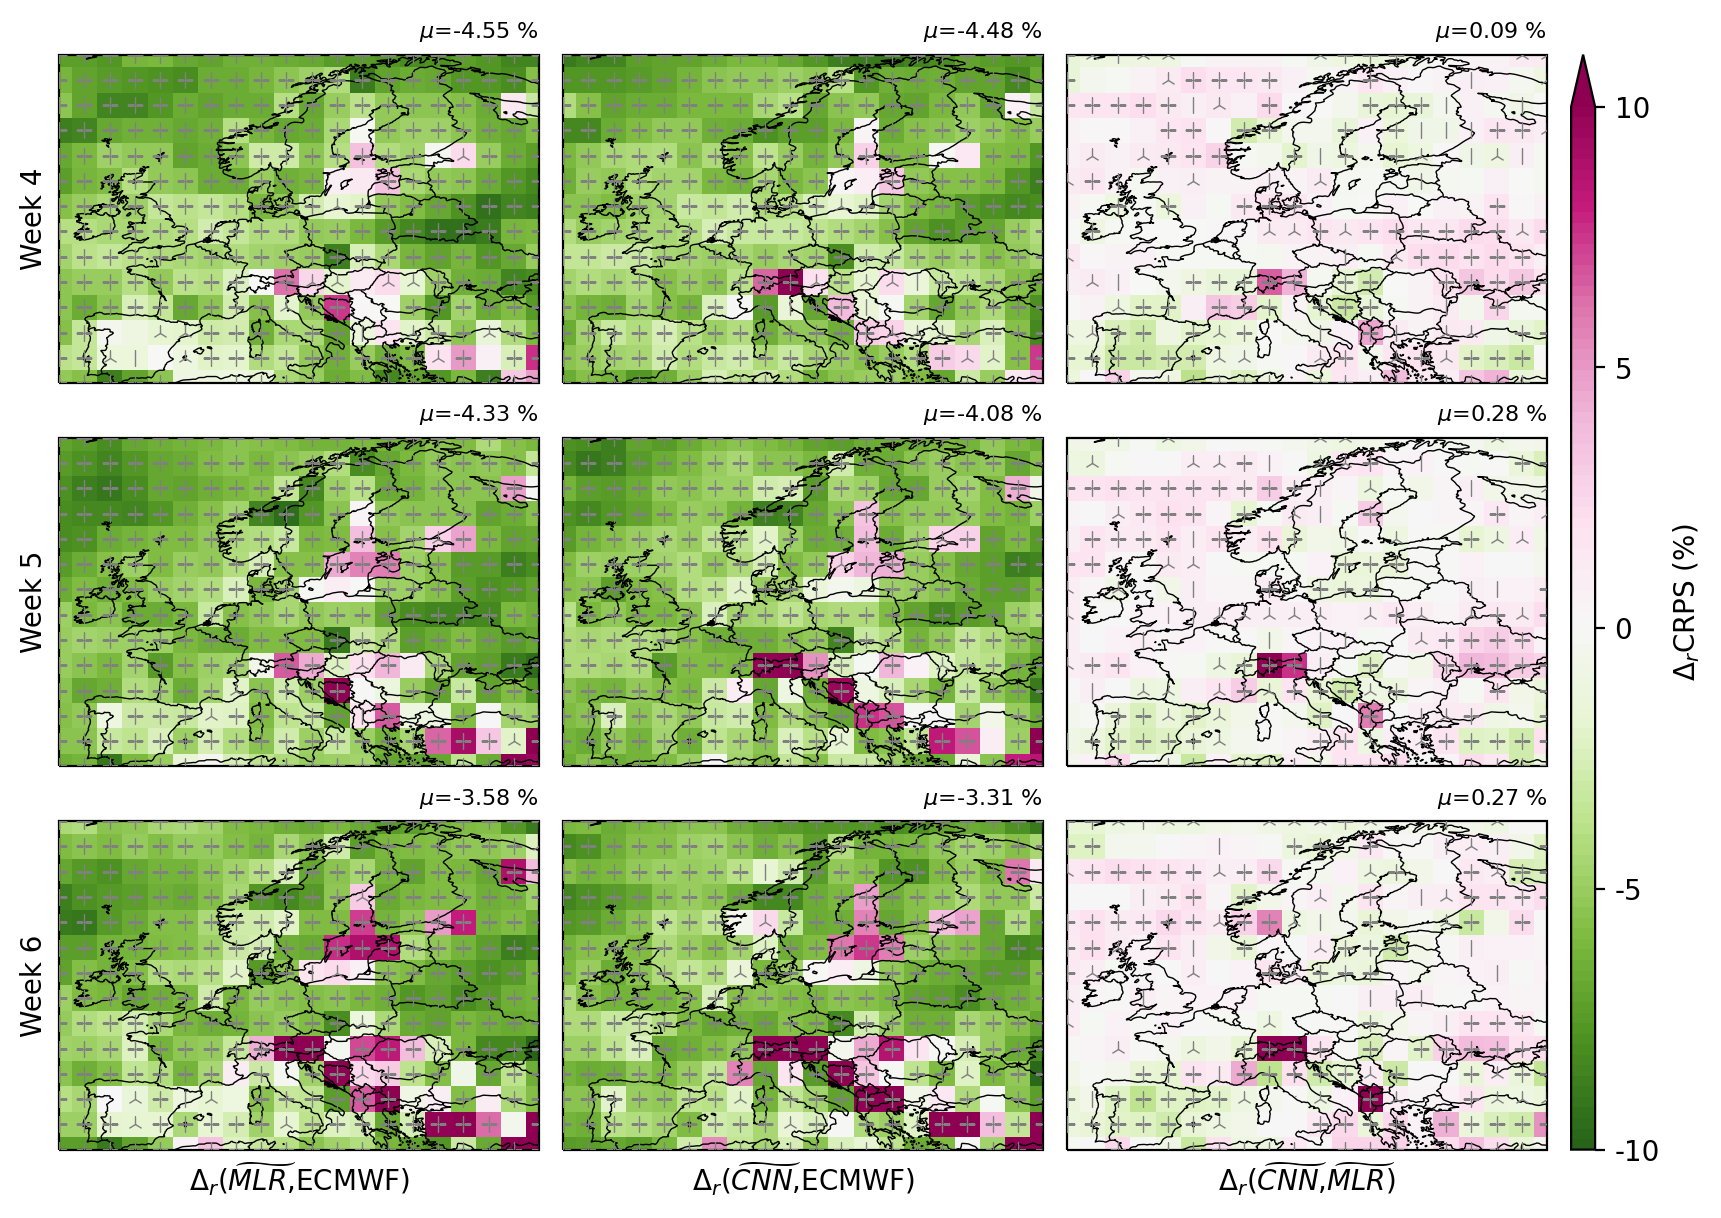

In [6]:
for score in ['MSE','CRPS']:
    benchs=['ECMWF','MLR']
    models_p1_map = ['$\\Delta$MLR-ECMWF','$\\Delta$CNN-ECMWF','$\\Delta$CNN-MLR']
    labels = ['$\\Delta_r$(MLR,ECMWF)','$\\Delta_r$(CNN,ECMWF)','$\\Delta_r$(CNN,MLR)']
    forPaper_diff_maps(das.sel(score=[score]),benchs,models_p1_map,labels,save_plt_path = 'data/results/WithOptuna/visualizations')

    benchs=['ECMWF','MLR_stocha']
    models_p1_map = ['$\\Delta$MLR_stocha-ECMWF','$\\Delta$CNN_stocha-ECMWF', '$\\Delta$CNN_stocha-MLR_stocha']
    labels = ['$\\Delta_r$$(\\widetilde{MLR}$,ECMWF)','$\\Delta_r$$(\\widetilde{CNN}$,ECMWF)', '$\\Delta_r$$(\\widetilde{CNN}$,$\\widetilde{MLR})$']
    
    forPaper_diff_maps(das.sel(score=[score]),benchs,models_p1_map,labels,save_plt_path = 'data/results/WithOptuna/visualizations')
